<a href="https://colab.research.google.com/github/sila-kara/DSA-210-Term-Project/blob/main/preprocessing_visualisation_hypothesistesting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing

In [7]:
import pandas as pd

wages_df = pd.read_csv("wages_by_education (1).csv")
inflation_df = pd.read_csv("inflation (1).csv")

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
inflation_df["avg_inflation"] = inflation_df[months].mean(axis=1)
inflation_clean = inflation_df[["Year", "avg_inflation"]].rename(columns={"Year": "year"})

merged_df = pd.merge(wages_df, inflation_clean, on="year")
merged_df = merged_df[merged_df["year"] >= 2000].copy()

groups = ["white", "black", "men", "women"]
edu_levels = ["less_than_hs", "high_school", "some_college", "bachelors_degree", "advanced_degree"]

for group in groups:
    for edu in edu_levels:
        col = f"{group}_{edu}"
        if col in merged_df.columns:
            merged_df[f"real_{col}"] = merged_df[col] * 100 / merged_df["avg_inflation"]

final_columns = ["year", "avg_inflation"] + [f"real_{g}_{e}" for g in groups for e in edu_levels]
real_wages_df = merged_df[final_columns]

real_wages_df.to_csv("real_wages_cleaned (1).csv", index=False)

## Visualisation

### Real Wage Difference Between Men and Women Across Different Educational Background Over The Years (2000-2022)

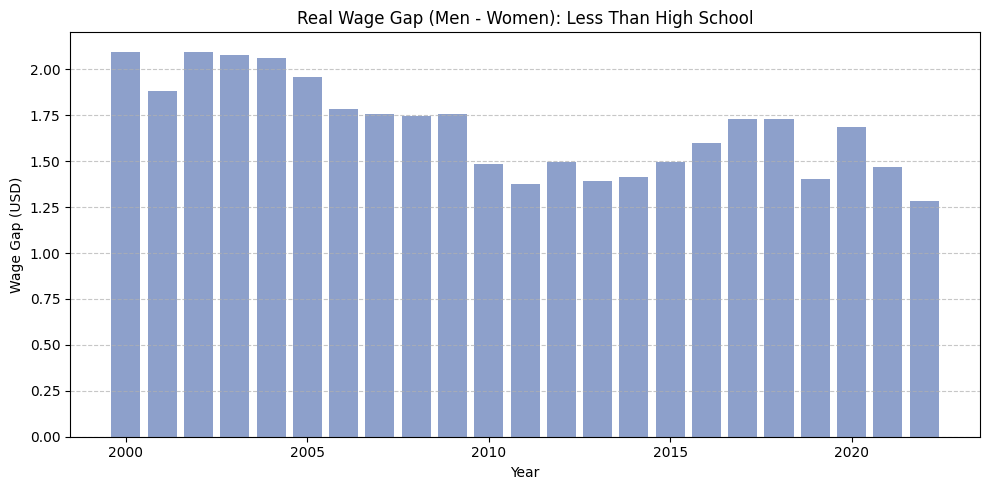

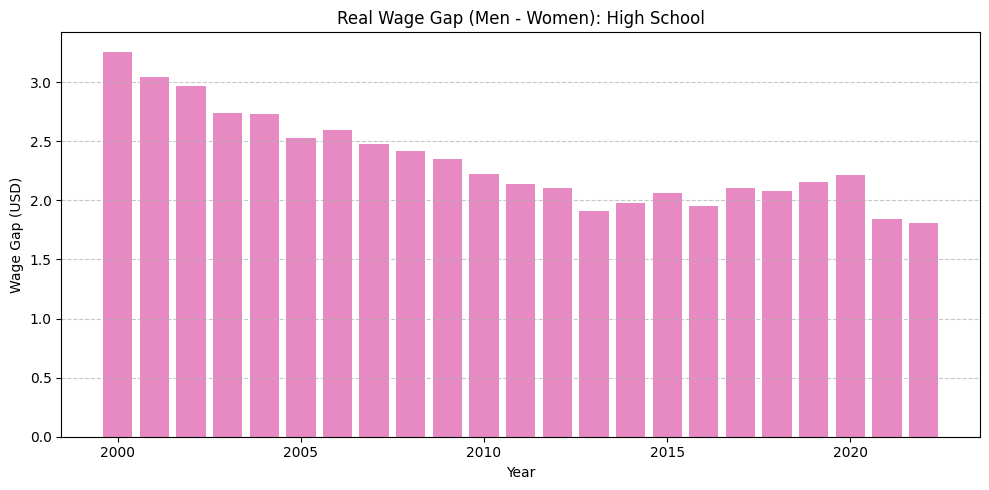

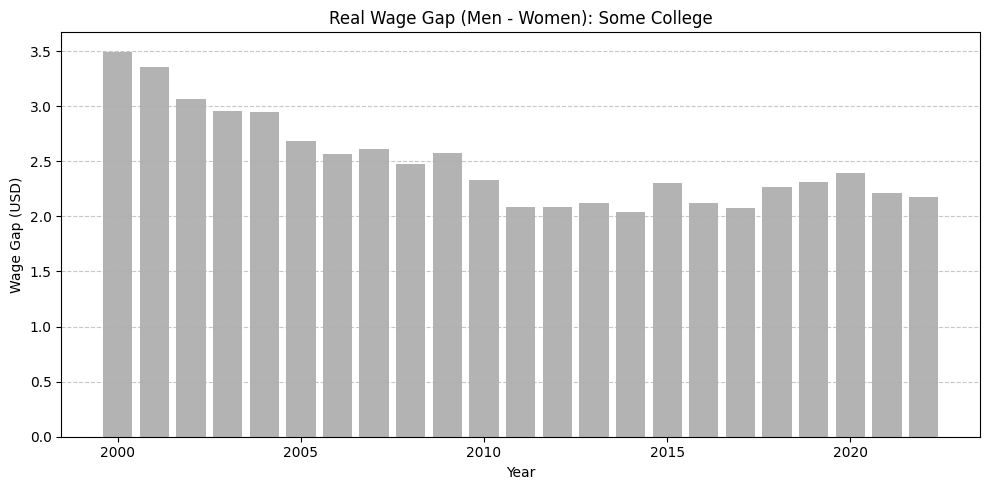

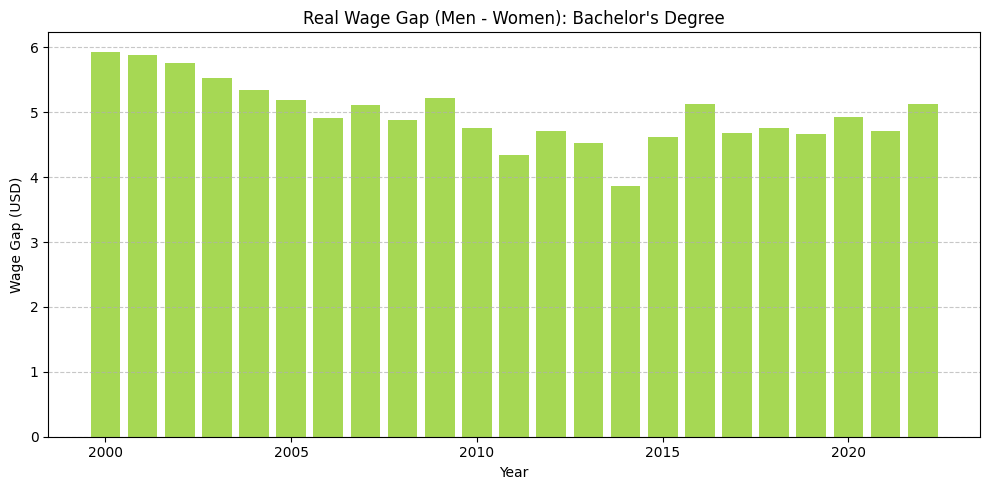

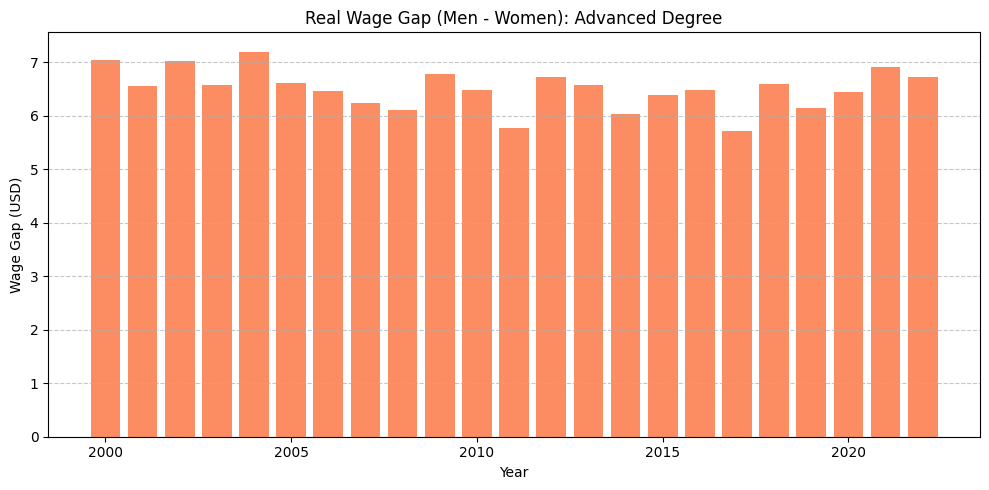

In [12]:
import matplotlib.pyplot as plt

merged_df["gap_less_than_hs_mw"] = merged_df["real_men_less_than_hs"] - merged_df["real_women_less_than_hs"]
merged_df["gap_high_school_mw"] = merged_df["real_men_high_school"] - merged_df["real_women_high_school"]
merged_df["gap_some_college_mw"] = merged_df["real_men_some_college"] - merged_df["real_women_some_college"]
merged_df["gap_bachelors_degree_mw"] = merged_df["real_men_bachelors_degree"] - merged_df["real_women_bachelors_degree"]
merged_df["gap_advanced_degree_mw"] = merged_df["real_men_advanced_degree"] - merged_df["real_women_advanced_degree"]

gap_cols_mw = {
    "Less Than High School": "gap_less_than_hs_mw",
    "High School": "gap_high_school_mw",
    "Some College": "gap_some_college_mw",
    "Bachelor's Degree": "gap_bachelors_degree_mw",
    "Advanced Degree": "gap_advanced_degree_mw"
}

for label, col in gap_cols_mw.items():
    plt.figure(figsize=(10, 5))
    plt.bar(merged_df["year"], merged_df[col], color=plt.cm.Set2(hash(label) % 8))
    plt.title(f"Real Wage Gap (Men - Women): {label}")
    plt.xlabel("Year")
    plt.ylabel("Wage Gap (USD)")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.show()

Overview:
These charts display the real hourly wage gap between men and women from 2000 to 2022, segmented by education level. Across all educational categories, men consistently earn more than women. The gap is especially prominent at the “Bachelor’s Degree” and “Advanced Degree” levels, hovering around 6–7 USD. While the wage gap has slightly declined over time in the “High School” and “Some College” categories, it has never closed. Notably, as the level of education increases, the gender wage gap also widens. This pattern indicates that even highly educated women continue to face systematic wage disadvantages compared to men, reflecting the ongoing influence of structural inequality and the glass ceiling effect.

### Line chart that shows the real wage gap difference between men and women from all educational backgrounds in the same graph

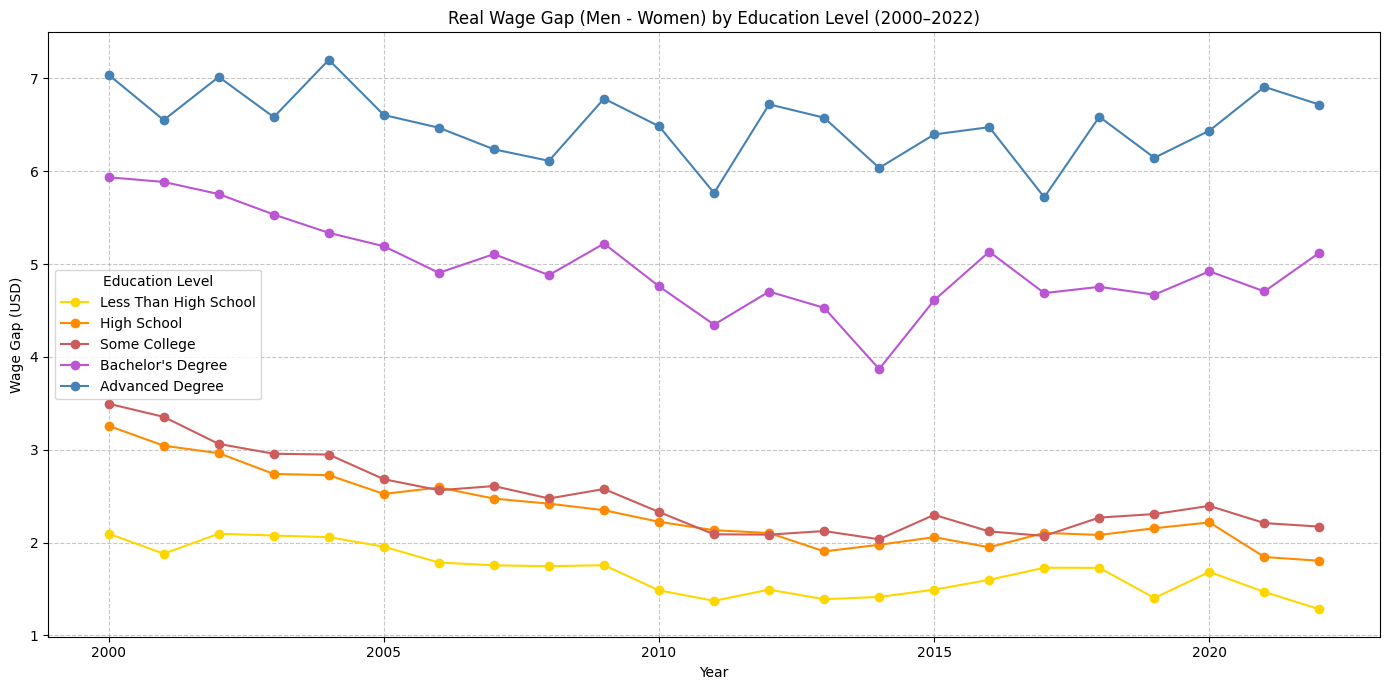

In [13]:
import matplotlib.pyplot as plt

mw_gap_columns = {
    "Less Than High School": "gap_less_than_hs_mw",
    "High School": "gap_high_school_mw",
    "Some College": "gap_some_college_mw",
    "Bachelor's Degree": "gap_bachelors_degree_mw",
    "Advanced Degree": "gap_advanced_degree_mw"
}

colors_mw = {
    "Less Than High School": "gold",
    "High School": "darkorange",
    "Some College": "indianred",
    "Bachelor's Degree": "mediumorchid",
    "Advanced Degree": "steelblue"
}

plt.figure(figsize=(14, 7))

for label, col in mw_gap_columns.items():
    plt.plot(merged_df["year"], merged_df[col], label=label, marker="o", color=colors_mw[label])

plt.title("Real Wage Gap (Men - Women) by Education Level (2000–2022)")
plt.xlabel("Year")
plt.ylabel("Wage Gap (USD)")
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(title="Education Level")
plt.tight_layout()
plt.show()

Overview:
The chart shows the real wage gap between men and women from 2000 to 2022 by education level. As education increases, the wage gap widens, with the largest differences seen at the advanced degree level. While the gap has slightly narrowed for lower education levels, gender-based wage inequality remains persistent and pronounced among higher-educated individuals.

### Real Wage Difference Between Black and White Individuals Across Different Educational Background Over The Years (2000-2022)

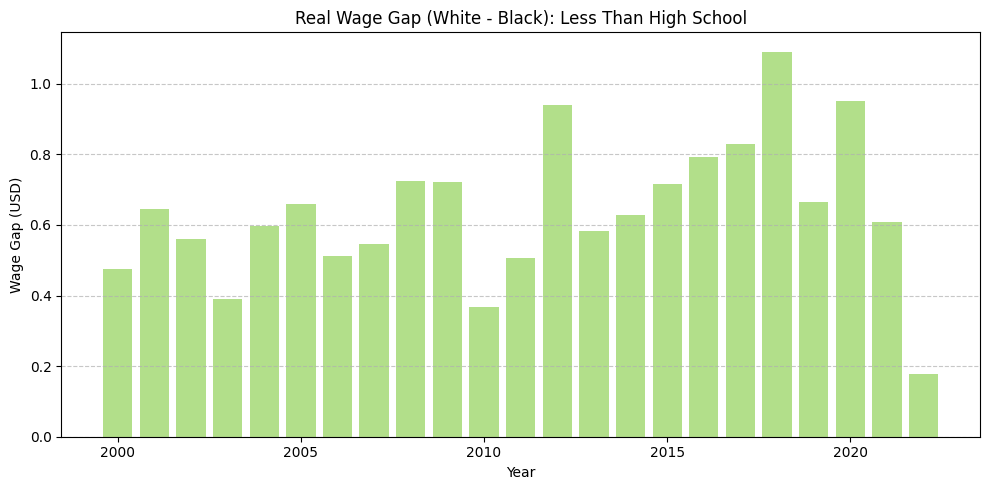

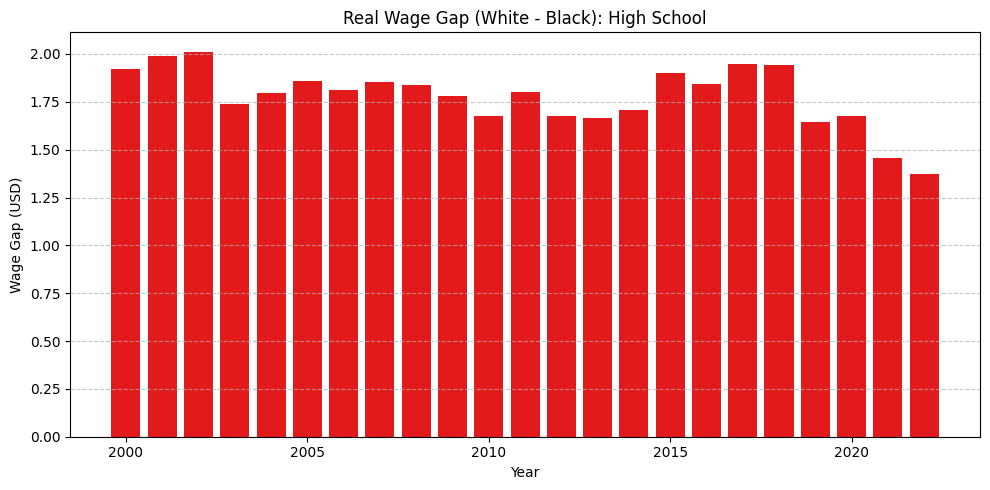

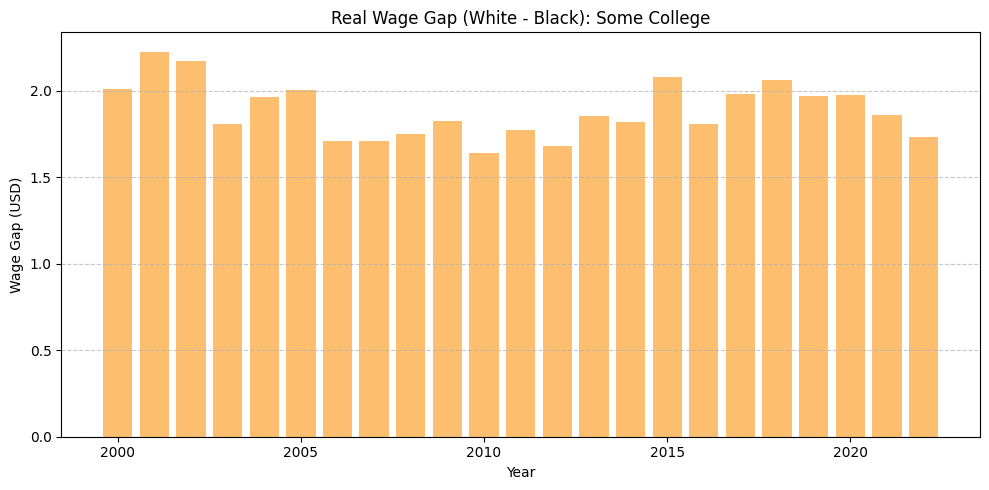

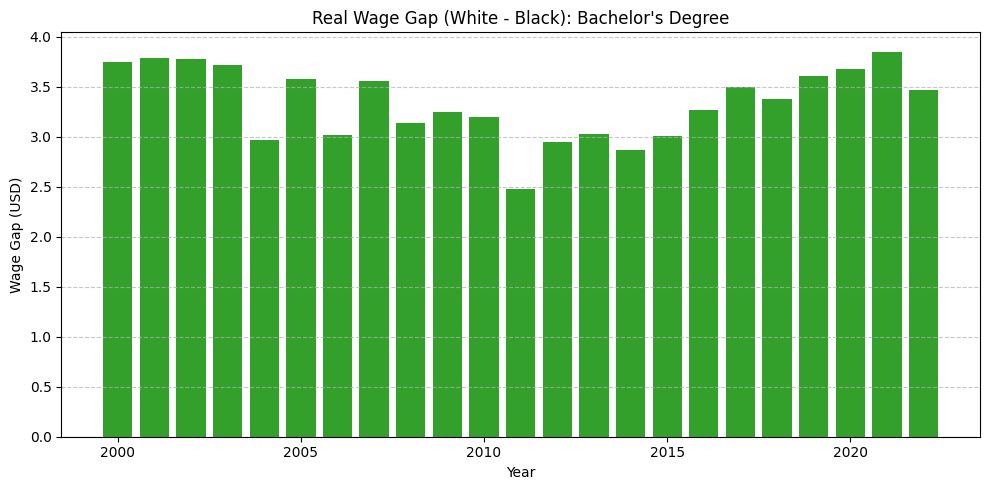

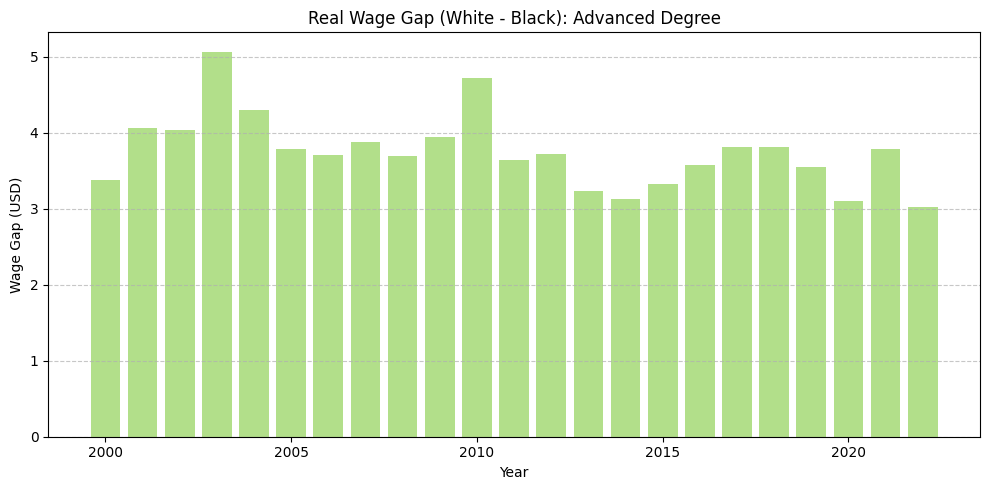

In [ ]:
import matplotlib.pyplot as plt

merged_df["gap_less_than_hs"] = merged_df["real_white_less_than_hs"] - merged_df["real_black_less_than_hs"]
merged_df["gap_high_school"] = merged_df["real_white_high_school"] - merged_df["real_black_high_school"]
merged_df["gap_some_college"] = merged_df["real_white_some_college"] - merged_df["real_black_some_college"]
merged_df["gap_bachelors_degree"] = merged_df["real_white_bachelors_degree"] - merged_df["real_black_bachelors_degree"]
merged_df["gap_advanced_degree"] = merged_df["real_white_advanced_degree"] - merged_df["real_black_advanced_degree"]

gap_columns = {
    "Less Than High School": "gap_less_than_hs",
    "High School": "gap_high_school",
    "Some College": "gap_some_college",
    "Bachelor's Degree": "gap_bachelors_degree",
    "Advanced Degree": "gap_advanced_degree"
}

for label, col in gap_columns.items():
    plt.figure(figsize=(10, 5))
    plt.bar(merged_df["year"], merged_df[col], color=plt.cm.Paired(hash(label) % 12))
    plt.title(f"Real Wage Gap (White - Black): {label}")
    plt.xlabel("Year")
    plt.ylabel("Wage Gap (USD)")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.show()

Overview:

These graphs illustrate the real hourly wage gap between White and Black individuals from 2000 to 2022, segmented by education level (Less than High School, High School, Some College, Bachelor's Degree, Advanced Degree). Overall, the wage gap tends to widen with higher education levels. In the "Less than High School" category, the wage gap is low and more variable, whereas in the "Advanced Degree" category, it consistently ranges between 3–5 USD. This trend indicates that racial wage inequality becomes more pronounced as educational attainment increases. Especially in Bachelor's and Advanced Degrees, the gap remains persistently high, revealing that even highly educated Black individuals continue to face significant income disparities compared to their White counterparts.

###Line chart that shows the real wage gap difference between black and white individuals from all educational backgrounds in the same graph

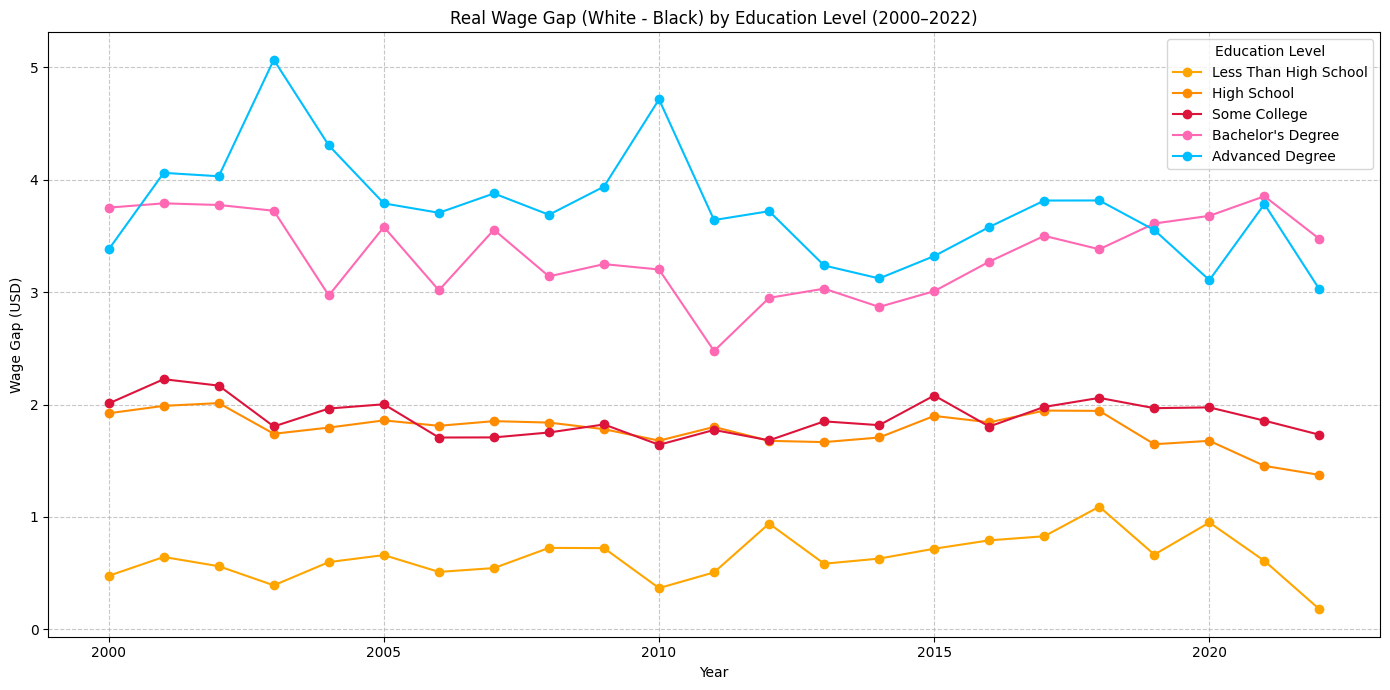

In [15]:
import matplotlib.pyplot as plt

# Recalculate gap columns if they don't exist
if "gap_less_than_hs" not in merged_df.columns:
    merged_df["gap_less_than_hs"] = merged_df["real_white_less_than_hs"] - merged_df["real_black_less_than_hs"]
    merged_df["gap_high_school"] = merged_df["real_white_high_school"] - merged_df["real_black_high_school"]
    merged_df["gap_some_college"] = merged_df["real_white_some_college"] - merged_df["real_black_some_college"]
    merged_df["gap_bachelors_degree"] = merged_df["real_white_bachelors_degree"] - merged_df["real_black_bachelors_degree"]
    merged_df["gap_advanced_degree"] = merged_df["real_white_advanced_degree"] - merged_df["real_black_advanced_degree"]


gap_columns = {
    "Less Than High School": "gap_less_than_hs",
    "High School": "gap_high_school",
    "Some College": "gap_some_college",
    "Bachelor's Degree": "gap_bachelors_degree",
    "Advanced Degree": "gap_advanced_degree"
}

colors = {
    "Less Than High School": "orange",
    "High School": "darkorange",
    "Some College": "crimson",
    "Bachelor's Degree": "hotpink",
    "Advanced Degree": "deepskyblue"
}

plt.figure(figsize=(14, 7))

for label, col in gap_columns.items():
    plt.plot(merged_df["year"], merged_df[col], label=label, marker="o", color=colors[label])

plt.title("Real Wage Gap (White - Black) by Education Level (2000–2022)")
plt.xlabel("Year")
plt.ylabel("Wage Gap (USD)")
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(title="Education Level")
plt.tight_layout()
plt.show()

Overview:
This chart shows the real wage gap between White and Black individuals from 2000 to 2022 across different education levels. Overall, the wage gap increases with higher education levels, peaking at the advanced degree level. However, the gap fluctuates significantly over time and has shown a slight downward trend in recent years. At lower education levels—especially “Less Than High School”—the gap remains smaller and has declined noticeably over time. This indicates that racial wage inequality is most persistent and severe among highly educated individuals.

##Hypothesis Testing

### Hypothesis 1
The real wage gap between men and women is significantly larger at higher education levels (Bachelor’s + Advanced) than at lower education levels (Some College + High School + Less than High School) over the period 2000–2022.

#### Null Hypothesis (H₀)
"There is no significant difference in the real wage gap between men and women across higher education levels (Bachelor’s + Advanced) and lower education levels (Some College + High School + Less than High School) over the period 2000–2022."

#### Alternative Hypothesis (H₁)
"The real wage gap between men and women is significantly larger at higher education levels (Bachelor’s + Advanced) than at lower education levels (Some College + High School + Less than High School) over the period 2000–2022."

#### Line Chart: Men vs Women Wage Gap by High/Low Education Level (2000–2022)

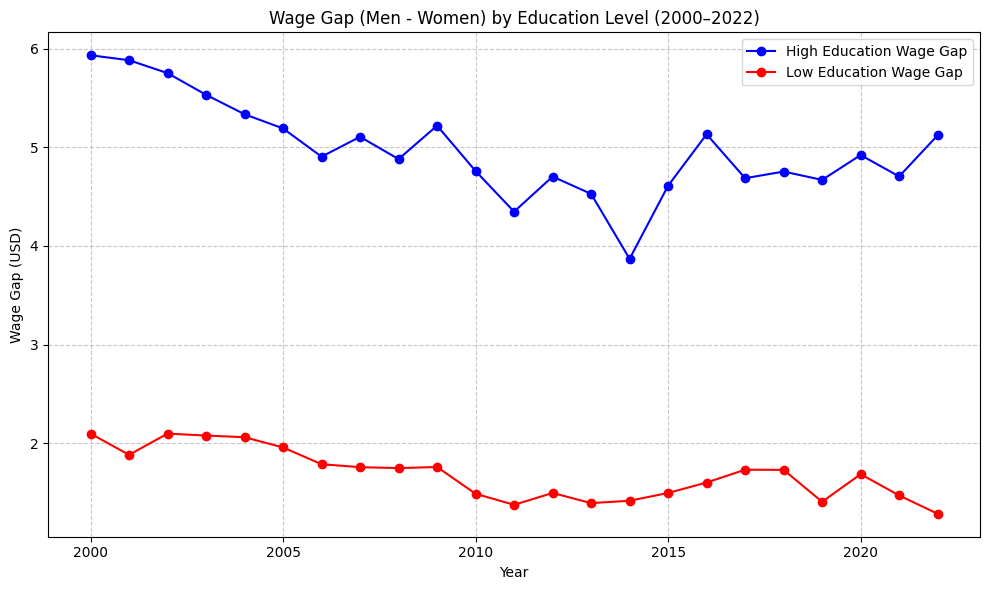

In [16]:
import matplotlib.pyplot as plt

high_edu_gap = merged_df["gap_bachelors_degree_mw"]
low_edu_gap = merged_df["gap_less_than_hs_mw"]

plt.figure(figsize=(10, 6))
plt.plot(merged_df["year"], high_edu_gap, label='High Education Wage Gap', color='blue', marker='o')
plt.plot(merged_df["year"], low_edu_gap, label='Low Education Wage Gap', color='red', marker='o')

plt.title("Wage Gap (Men - Women) by Education Level (2000–2022)")
plt.xlabel("Year")
plt.ylabel("Wage Gap (USD)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

#### Bar Chart: Men vs Women Average Wage Gap by High/Low Education Level (2000–2022)

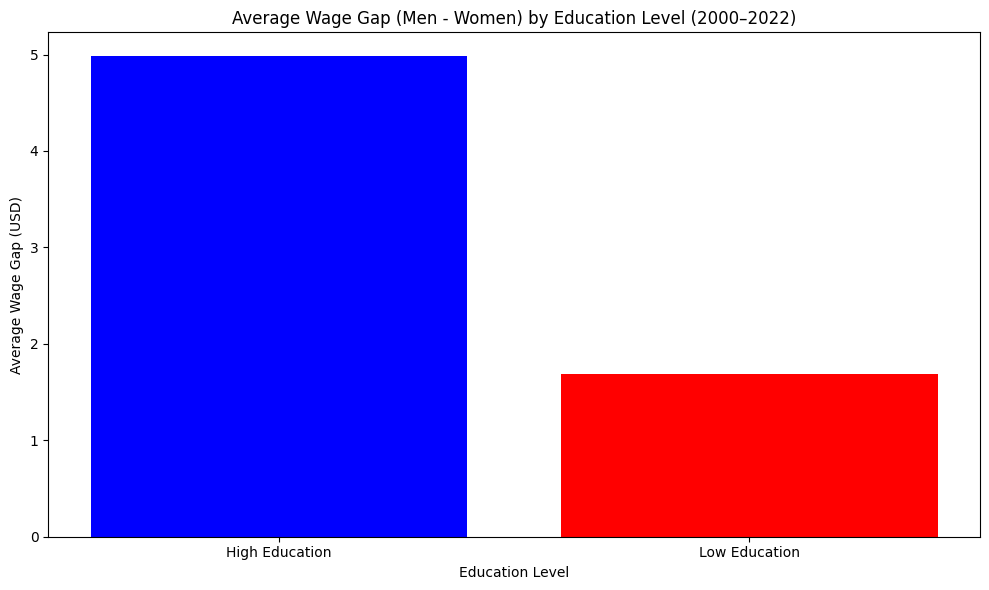

In [17]:
high_edu_mean_gap = [high_edu_gap.mean()]
low_edu_mean_gap = [low_edu_gap.mean()]

plt.figure(figsize=(10, 6))
plt.bar(["High Education", "Low Education"], high_edu_mean_gap + low_edu_mean_gap, color=["blue", "red"])

plt.title("Average Wage Gap (Men - Women) by Education Level (2000–2022)")
plt.ylabel("Average Wage Gap (USD)")
plt.xlabel("Education Level")
plt.tight_layout()
plt.show()

#### Boxplot: Men vs Women Average Wage Gap by High/Low Education Level (2000–2022)

<ipython-input-25-3637506e6b2c>:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([high_edu_gap, low_edu_gap], labels=["High Education", "Low Education"])


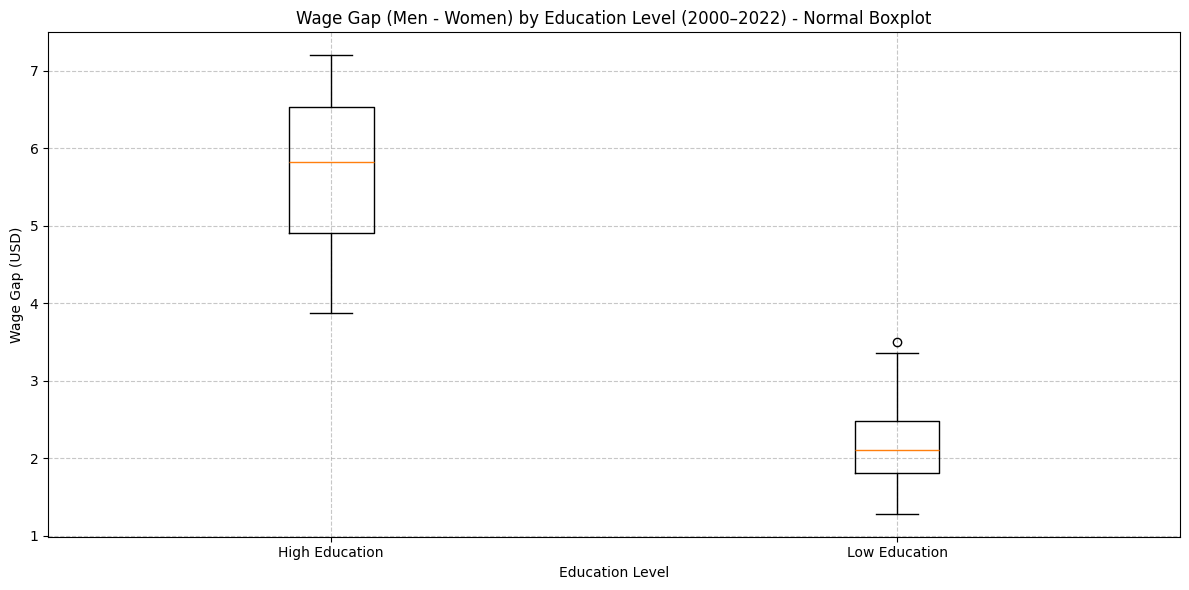

In [ ]:
import matplotlib.pyplot as plt

high_edu_gap = pd.concat([
    merged_df["real_men_bachelors_degree"] - merged_df["real_women_bachelors_degree"],
    merged_df["real_men_advanced_degree"] - merged_df["real_women_advanced_degree"]
], ignore_index=True)

low_edu_gap = pd.concat([
    merged_df["real_men_some_college"] - merged_df["real_women_some_college"],
    merged_df["real_men_high_school"] - merged_df["real_women_high_school"],
    merged_df["real_men_less_than_hs"] - merged_df["real_women_less_than_hs"]
], ignore_index=True)

plt.figure(figsize=(12, 6))
plt.boxplot([high_edu_gap, low_edu_gap], labels=["High Education", "Low Education"])

plt.title("Wage Gap (Men - Women) by Education Level (2000–2022) - Normal Boxplot")
plt.ylabel("Wage Gap (USD)")
plt.xlabel("Education Level")
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

#### Hypothesis Testing for Hypothesis 1

In [ ]:
import pandas as pd
from scipy import stats

file_path = 'real_wages_cleaned.csv'
data = pd.read_csv(file_path)

higher_education_columns_men = ['real_men_bachelors_degree', 'real_men_advanced_degree']
lower_education_columns_men = ['real_men_less_than_hs', 'real_men_high_school', 'real_men_some_college']

higher_education_columns_women = ['real_women_bachelors_degree', 'real_women_advanced_degree']
lower_education_columns_women = ['real_women_less_than_hs', 'real_women_high_school', 'real_women_some_college']

wage_gap_higher_men_women = data[higher_education_columns_men].mean(axis=1) - data[higher_education_columns_women].mean(axis=1)
wage_gap_lower_men_women = data[lower_education_columns_men].mean(axis=1) - data[lower_education_columns_women].mean(axis=1)

t_statistic, p_value = stats.ttest_ind(wage_gap_higher_men_women, wage_gap_lower_men_women, equal_var=False)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

if p_value < 0.05:
    print("Null hypothesis is rejected. The wage gap between men and women may be significantly larger at higher education levels.")
else:
    print("Null hypothesis is not rejected. There is no significant difference in the wage gap between higher and lower education levels.")

T-statistic: 32.72590698861842
P-value: 3.324999661507187e-32
Null hypothesis is rejected. The wage gap between men and women may be significantly larger at higher education levels.


### Hypothesis 2
The real wage gap between men and women is significantly larger at higher education levels (Bachelor’s + Advanced) than at lower education levels (Some College + High School + Less than High School) over the period 2000–2022.

#### Null Hypothesis (H₀)
"There is no significant difference in the real wage gap between White and Black individuals across the two time periods (2000–2010 and 2011–2022) for each education level."

#### Alternative Hypothesis (H₁)
"There is a significant difference in the real wage gap between White and Black individuals across the two time periods (2000–2010 and 2011–2022) for each education level."

Bar Chart

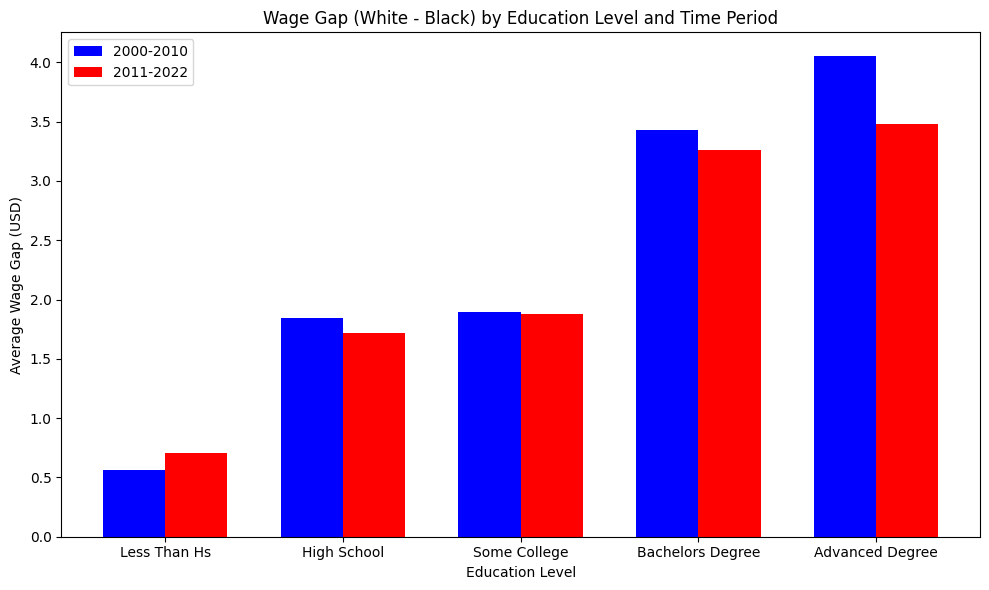

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'real_wages_cleaned.csv'
data = pd.read_csv(file_path)

data_2000_2010 = data[data['year'] <= 2010]
data_2011_2022 = data[data['year'] > 2010]

education_levels = ['less_than_hs', 'high_school', 'some_college', 'bachelors_degree', 'advanced_degree']

wage_gap_2000_2010 = [data_2000_2010[f'real_white_{level}'].mean() - data_2000_2010[f'real_black_{level}'].mean() for level in education_levels]
wage_gap_2011_2022 = [data_2011_2022[f'real_white_{level}'].mean() - data_2011_2022[f'real_black_{level}'].mean() for level in education_levels]

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = range(len(education_levels))

bar1 = ax.bar(index, wage_gap_2000_2010, bar_width, label='2000-2010', color='blue')
bar2 = ax.bar([i + bar_width for i in index], wage_gap_2011_2022, bar_width, label='2011-2022', color='red')

ax.set_xlabel('Education Level')
ax.set_ylabel('Average Wage Gap (USD)')
ax.set_title('Wage Gap (White - Black) by Education Level and Time Period')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels([level.replace('_', ' ').title() for level in education_levels])
ax.legend()

plt.tight_layout()
plt.show()

Box Plot

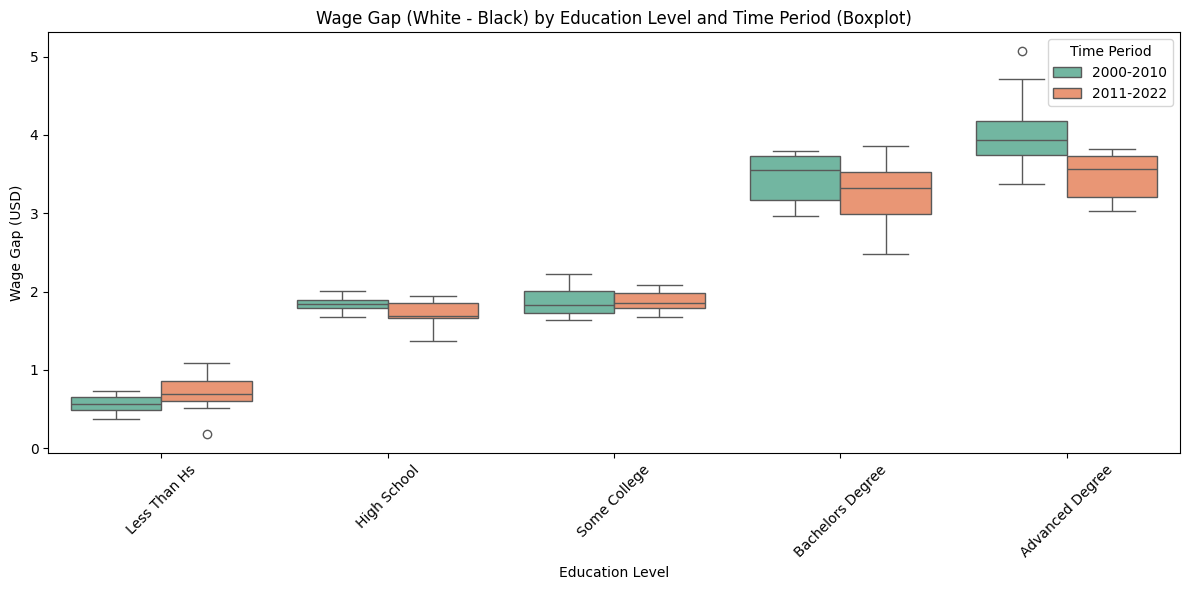

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'real_wages_cleaned.csv'
data = pd.read_csv(file_path)

data_2000_2010 = data[data['year'] <= 2010]
data_2011_2022 = data[data['year'] > 2010]

education_levels = ['less_than_hs', 'high_school', 'some_college', 'bachelors_degree', 'advanced_degree']

wage_gap_2000_2010 = [data_2000_2010[f'real_white_{level}'] - data_2000_2010[f'real_black_{level}'] for level in education_levels]
wage_gap_2011_2022 = [data_2011_2022[f'real_white_{level}'] - data_2011_2022[f'real_black_{level}'] for level in education_levels]

wage_gap_data = []
time_periods = []
education_level_data = []

for i, level in enumerate(education_levels):
    wage_gap_data.extend(wage_gap_2000_2010[i])
    time_periods.extend(['2000-2010'] * len(wage_gap_2000_2010[i]))
    education_level_data.extend([level.replace('_', ' ').title()] * len(wage_gap_2000_2010[i]))

    wage_gap_data.extend(wage_gap_2011_2022[i])
    time_periods.extend(['2011-2022'] * len(wage_gap_2011_2022[i]))
    education_level_data.extend([level.replace('_', ' ').title()] * len(wage_gap_2011_2022[i]))

boxplot_data = pd.DataFrame({
    'Wage Gap (USD)': wage_gap_data,
    'Time Period': time_periods,
    'Education Level': education_level_data
})

plt.figure(figsize=(12, 6))
sns.boxplot(x='Education Level', y='Wage Gap (USD)', hue='Time Period', data=boxplot_data, palette='Set2')

plt.title('Wage Gap (White - Black) by Education Level and Time Period (Boxplot)')
plt.xlabel('Education Level')
plt.ylabel('Wage Gap (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Hypotesis Testing for Hypothesis 2

In [ ]:
import pandas as pd
from scipy import stats

file_path = 'real_wages_cleaned.csv'
data = pd.read_csv(file_path)

data_2000_2010 = data[data['year'] <= 2010]
data_2011_2022 = data[data['year'] > 2010]

education_levels = ['less_than_hs', 'high_school', 'some_college', 'bachelors_degree', 'advanced_degree']

test_results = {}

for level in education_levels:
    white_column = f'real_white_{level}'
    black_column = f'real_black_{level}'
    wage_gap_2000_2010 = data_2000_2010[white_column] - data_2000_2010[black_column]
    wage_gap_2011_2022 = data_2011_2022[white_column] - data_2011_2022[black_column]

    t_statistic, p_value = stats.ttest_ind(wage_gap_2000_2010, wage_gap_2011_2022, equal_var=False)

    test_results[level] = {
        'T-statistic': t_statistic,
        'P-value': p_value,
        'Reject H₀': p_value < 0.05
    }

for level, result in test_results.items():
    print(f"Education Level: {level.replace('_', ' ').title()}")
    print(f"T-statistic: {result['T-statistic']}")
    print(f"P-value: {result['P-value']}")
    print(f"Reject H₀: {result['Reject H₀']}\n")

Education Level: Less Than Hs
T-statistic: -1.8346741486216382
P-value: 0.08458034549806082
Reject H₀: False

Education Level: High School
T-statistic: 2.0611745970234927
P-value: 0.054434911642511394
Reject H₀: False

Education Level: Some College
T-statistic: 0.14528750385550587
P-value: 0.8861838112124
Reject H₀: False

Education Level: Bachelors Degree
T-statistic: 1.1548014485310207
P-value: 0.2613437852632704
Reject H₀: False

Education Level: Advanced Degree
T-statistic: 3.3884614623185323
P-value: 0.0036600586769737742
Reject H₀: True



## Machine Learning Methods

###  k-Nearest Neighbors (kNN)

Predict based on the labels of the nearest data points

#### with default parameters:

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

df = pd.read_csv("real_wages_cleaned (1).csv")

target = 'real_women_bachelors_degree'
features = [
    'real_black_bachelors_degree',
    'real_men_bachelors_degree',
    'real_white_bachelors_degree',
    'real_white_some_college',
    'real_white_advanced_degree'
]

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.3f}")
print(f"R² Score: {r2:.3f}")


RMSE: 0.634
R² Score: 0.821


#### with another parameters:

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

df = pd.read_csv("real_wages_cleaned (1).csv")

target = 'real_women_bachelors_degree'
features = [
    'real_black_bachelors_degree',
    'real_men_bachelors_degree',
    'real_white_bachelors_degree',
    'real_white_some_college',
    'real_white_advanced_degree'
]

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

results = {}

for k in [1, 3, 7, 10]:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[k] = (rmse, r2)

results_df = pd.DataFrame(results, index=["RMSE", "R²"]).T
results_df.index.name = "n_neighbors"

print(results_df)


                 RMSE        R²
n_neighbors                    
1            0.522216  0.878883
3            0.524158  0.877981
7            0.645109  0.815171
10           0.800755  0.715224


### 🔄 2. Results with Different `k` Values

| `k` (n_neighbors) | RMSE   | R²     | Interpretation                                                                 |
|-------------------|--------|--------|--------------------------------------------------------------------------------|
| 1                 | 0.522  | 0.879  | ✅ Best performance – lowest error and highest R², though may overfit the training data. |
| 3                 | 0.524  | 0.878  | ✅ Excellent performance – nearly as good as `k=1`, but more generalizable.    |
| 5 (default)       | 0.634  | 0.821  | 🟡 Good, but worse than `k=1` or `k=3`. May be too smooth for the complexity of the data. |
| 7                 | 0.645  | 0.815  | 🔻 Performance starts to drop; the model becomes less sensitive to local patterns. |
| 10                | 0.801  | 0.715  | 🔴 Weakest – averaging over too many neighbors leads to underfitting and poor predictions. |

---

### 🎯 Conclusion & Recommendation

- The **best predictive accuracy** is achieved with `k = 1`.
- While `k = 1` may be prone to **overfitting**, in this dataset it provides the **lowest RMSE** and **highest R²**.
- ✅ **Recommended value: `k = 1`**, as it delivers the best overall performance in this context.


#### Feature Importance Order

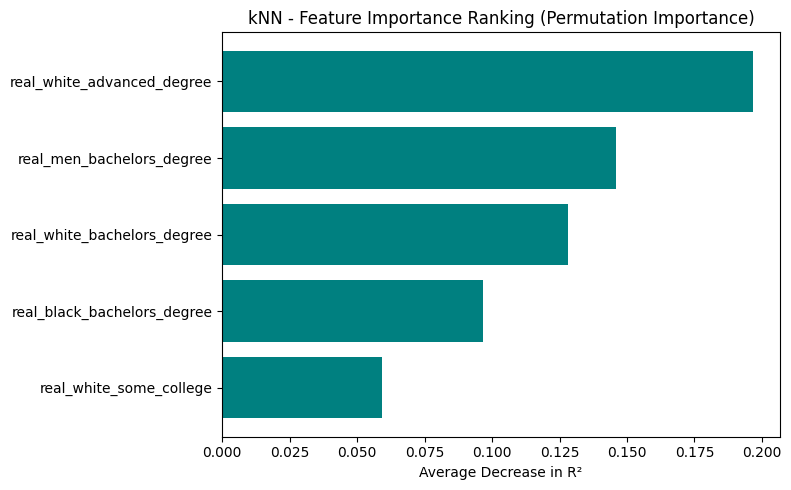

In [28]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import pandas as pd

perm = permutation_importance(knn, X_test, y_test, n_repeats=30, random_state=42)

importances = perm.importances_mean
feature_names = X.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(8, 5))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='teal')
plt.xlabel('Average Decrease in R²')
plt.title('kNN - Feature Importance Ranking (Permutation Importance)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

#### Best Fitting Line

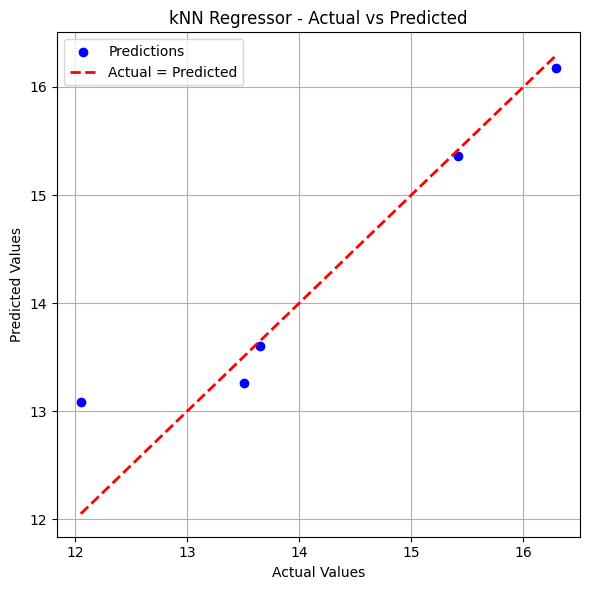

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Actual = Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('kNN Regressor - Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 2- Random Forest Regressor
An ensemble of decision trees with random sampling

#### with default parameters:

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

df = pd.read_csv("real_wages_cleaned (1).csv")

target = 'real_women_bachelors_degree'
features = [
    'real_black_bachelors_degree',
    'real_men_bachelors_degree',
    'real_white_bachelors_degree',
    'real_white_some_college',
    'real_white_advanced_degree'
]

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.3f}")
print(f"R² Score: {r2:.3f}")


RMSE: 0.479
R² Score: 0.898


#### with another parameters:

In [37]:
params_list = [
    {'n_estimators': 10, 'max_depth': 3},
    {'n_estimators': 50, 'max_depth': 5},
    {'n_estimators': 100, 'max_depth': None},
    {'n_estimators': 200, 'max_depth': 10}
]

results = []

for params in params_list:
    rf = RandomForestRegressor(
        n_estimators=params['n_estimators'],
        max_depth=params['max_depth'],
        random_state=42
    )
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results.append({
        'n_estimators': params['n_estimators'],
        'max_depth': params['max_depth'],
        'RMSE': round(rmse, 3),
        'R²': round(r2, 3)
    })

results_df = pd.DataFrame(results)
print(results_df)


   n_estimators  max_depth   RMSE     R²
0            10        3.0  0.533  0.874
1            50        5.0  0.480  0.898
2           100        NaN  0.479  0.898
3           200       10.0  0.474  0.900


### 🔄 Results with Different Parameter Settings

| n_estimators | max_depth | RMSE   | R²     | Interpretation |
|--------------|-----------|--------|--------|----------------|
| 10           | 3         | 0.533  | 0.874  | 🔻 Weaker trees, limited depth — reduced performance. |
| 50           | 5         | 0.480  | 0.898  | ✅ Strong performance, nearly equal to the default. |
| 100 *(default)* | None    | 0.479  | 0.898  | ✅ Same as default model — deep trees allowed, balanced complexity. |
| 200          | 10        | 0.474  | 0.900  | ✅ Slight improvement — more estimators and controlled depth enhance accuracy. |

---

### 🎯 Conclusion & Recommendation

- The Random Forest model performs consistently well across different settings.
- Increasing `n_estimators` and tuning `max_depth` **slightly improves performance**, though the gains are marginal.
- **Recommended setting:** `n_estimators = 200`, `max_depth = 10`, which gives the **lowest RMSE** and **highest R²** in your tests.


#### Feature Importance Ranking (Permutation-Based)

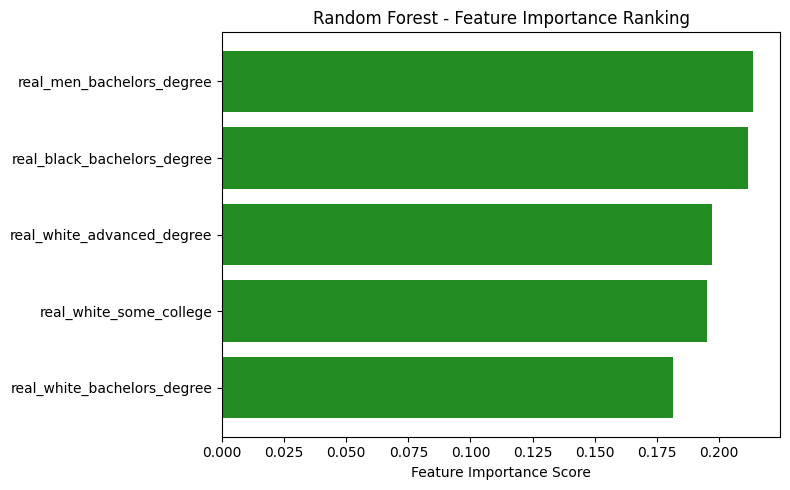

In [30]:
import pandas as pd

importances = rf.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(8, 5))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='forestgreen')
plt.xlabel('Feature Importance Score')
plt.title('Random Forest - Feature Importance Ranking')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

#### Best-Fitting Line (Actual vs. Predicted)

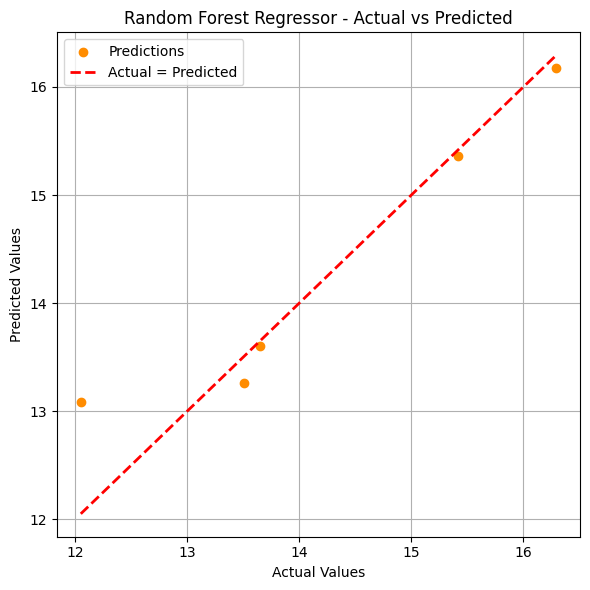

In [29]:
import matplotlib.pyplot as plt

y_pred_rf = rf.predict(X_test)

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_rf, color='darkorange', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Actual = Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Regressor - Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 3- XGBoost Regressor

with default parameters:

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from xgboost import XGBRegressor

df = pd.read_csv("real_wages_cleaned (1).csv")

target = 'real_women_bachelors_degree'
features = [
    'real_black_bachelors_degree',
    'real_men_bachelors_degree',
    'real_white_bachelors_degree',
    'real_white_some_college',
    'real_white_advanced_degree'
]

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.3f}")
print(f"R² Score: {r2:.3f}")

RMSE: 0.507
R² Score: 0.886


### with another parameters:

In [39]:
param_grid = [
    {'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.1},
    {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.05},
    {'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.01},
    {'n_estimators': 150, 'max_depth': 4, 'learning_rate': 0.2}
]

results = []

for params in param_grid:
    model = XGBRegressor(
        n_estimators=params['n_estimators'],
        max_depth=params['max_depth'],
        learning_rate=params['learning_rate'],
        random_state=42
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results.append({
        'n_estimators': params['n_estimators'],
        'max_depth': params['max_depth'],
        'learning_rate': params['learning_rate'],
        'RMSE': round(rmse, 3),
        'R²': round(r2, 3)
    })

results_df = pd.DataFrame(results)
print(results_df)

   n_estimators  max_depth  learning_rate   RMSE     R²
0            50          3           0.10  0.560  0.861
1           100          5           0.05  0.560  0.861
2           200          6           0.01  0.786  0.726
3           150          4           0.20  0.508  0.885


### 🔄 Results with Different Parameter Settings

| n_estimators | max_depth | learning_rate | RMSE   | R²     | Interpretation |
|--------------|-----------|----------------|--------|--------|----------------|
| 50           | 3         | 0.10           | 0.560  | 0.861  | 🟡 Decent, but less accurate than the default. Trees are likely too shallow. |
| 100          | 5         | 0.05           | 0.560  | 0.861  | 🟡 Same as above — increased estimators but smaller learning rate neutralized gains. |
| 200          | 6         | 0.01           | 0.786  | 0.726  | 🔻 Overly slow learning; model underfits and performs poorly. |
| 150          | 4         | 0.20           | 0.508  | 0.885  | ✅ Very close to default performance — solid balance of depth and learning rate. |

---

### 🎯 Conclusion & Recommendation

- The **default XGBoost settings** (`n_estimators=100`, `learning_rate=0.1`, `max_depth=3`) work very well on this dataset.
- Tweaking parameters didn’t significantly improve performance — some even caused underfitting (e.g. very low learning rate).
- **Recommended:** Stick with **default** or try `n_estimators=150`, `max_depth=4`, `learning_rate=0.2` for a comparable result.


#### Feature Importance Ranking (XGBoost Built-in)

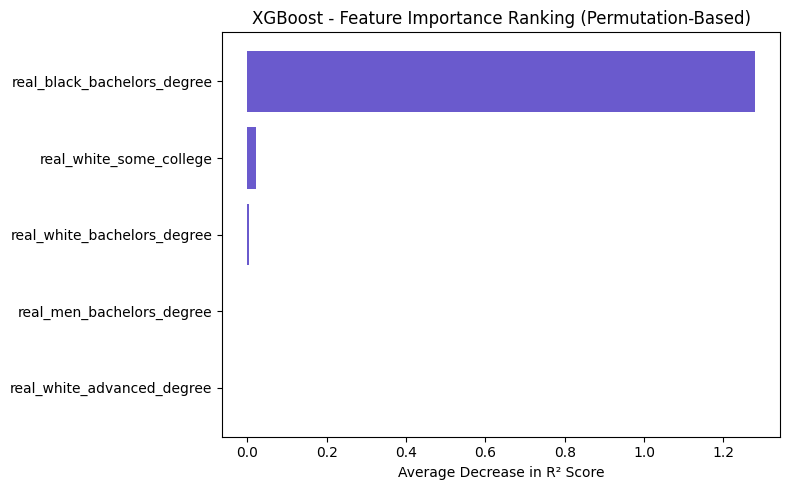

In [35]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import pandas as pd

perm = permutation_importance(xgb, X_test, y_test, n_repeats=30, random_state=42)

importances = perm.importances_mean
feature_names = X.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(8, 5))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='slateblue')
plt.xlabel('Average Decrease in R² Score')
plt.title('XGBoost - Feature Importance Ranking (Permutation-Based)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

#### Actual vs. Predicted Plot (Best-Fitting Line)

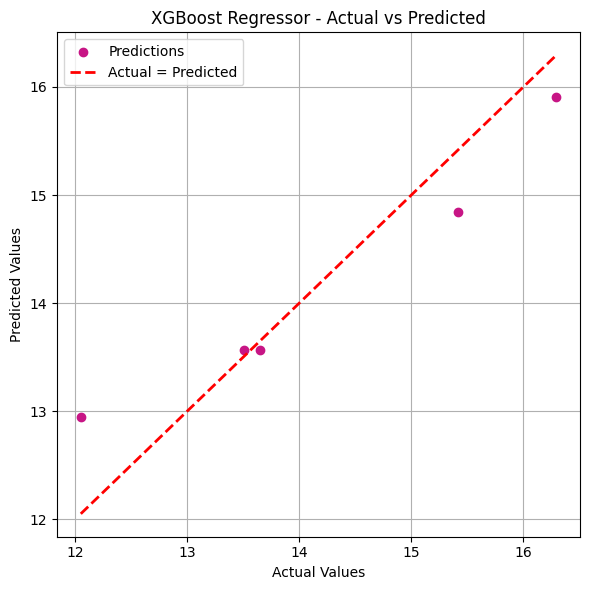

In [36]:
import matplotlib.pyplot as plt

y_pred_xgb = xgb.predict(X_test)

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_xgb, color='mediumvioletred', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Actual = Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('XGBoost Regressor - Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Comparison Between Models


#### Model Comparison Bar Charts (RMSE & R²)

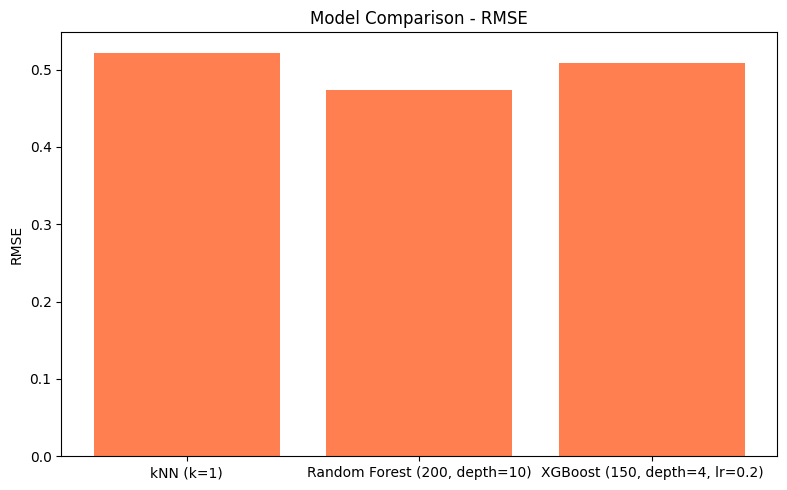

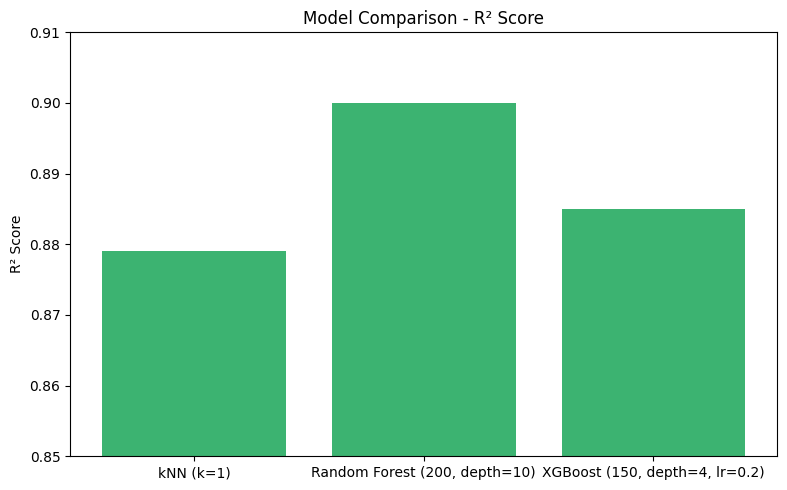

In [40]:
import matplotlib.pyplot as plt

models = ['kNN (k=1)', 'Random Forest (200, depth=10)', 'XGBoost (150, depth=4, lr=0.2)']
rmse_values = [0.522, 0.474, 0.508]
r2_values = [0.879, 0.900, 0.885]

plt.figure(figsize=(8, 5))
plt.bar(models, rmse_values, color='coral')
plt.ylabel('RMSE')
plt.title('Model Comparison - RMSE')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.bar(models, r2_values, color='mediumseagreen')
plt.ylabel('R² Score')
plt.title('Model Comparison - R² Score')
plt.ylim(0.85, 0.91)
plt.tight_layout()
plt.show()


## 🧠 Comparison of Model Characteristics

---

### 🔧 Model Complexity & Interpretability

🟦 **kNN Regressor (k = 1)**  
→ **Complexity**: Low  
→ **Interpretability**: High – simple and intuitive; predictions based on closest neighbors

🟩 **Random Forest Regressor (n_estimators = 200, max_depth = 10)**  
→ **Complexity**: Medium  
→ **Interpretability**: Medium – provides built-in feature importance, but internal logic is harder to trace

🔷 **XGBoost Regressor (n_estimators = 150, max_depth = 4, learning_rate = 0.2)**  
→ **Complexity**: High  
→ **Interpretability**: Moderate to Low – interpretable through SHAP/gain, but requires advanced tools

---

### 💻 Training Time & Scalability

🟦 **kNN Regressor (k = 1)**  
→ No training phase, but **slow prediction** (computes distance to all training points)

🟩 **Random Forest Regressor**  
→ **Fast training**, scalable via tree-level parallelism, efficient for small to medium datasets

🔷 **XGBoost Regressor**  
→ **Moderate training time**, highly optimized, supports GPU acceleration for large-scale learning

---

### 📊 Feature Importance Availability

🟩 **Random Forest** → ✅ Built-in feature importance (gini importance / mean decrease in impurity)  
🔷 **XGBoost** → ✅ Available via gain, cover, or SHAP  
🟦 **kNN** → ❌ Not available – non-parametric, instance-based method

---

### ⚠️ Sensitivity to Noise & Outliers

🔷 **XGBoost** → Medium – can overfit if regularization is not tuned properly  
🟩 **Random Forest** → Low – robust due to averaging over multiple trees  
🟦 **kNN** → High – highly sensitive to outliers and local noise in the training data

---

### 🔮 Extrapolation & Generalization

🔷 **XGBoost** → Strong generalization, capable of modeling complex non-linear relationships  
🟩 **Random Forest** → Good generalization, but weak in extrapolation beyond training domain  
🟦 **kNN** → No extrapolation – predictions are based on local interpolation

---

## 📊 Comparison of Regression Models (Best Results)

| Model           | RMSE   | R²     | Notes |
|----------------|--------|--------|-------|
| 🔷 **XGBoost**  | 0.508  | 0.885  | High accuracy, especially effective on complex patterns |
| 🟩 **Random Forest** | 0.474  | 0.900  | **Best overall performance** – lowest error, highest explained variance ✅ |
| 🟦 **kNN (k=1)** | 0.522  | 0.879  | Performs well, but may overfit and lacks scalability ⚠️ |

---

## 📌 Summary

✅ **Random Forest Regressor** achieved the best performance in terms of both **prediction accuracy (lowest RMSE)** and **variance explanation (highest R²)**. It is also robust and interpretable, making it the recommended model for deployment.

✅ **XGBoost** is a very strong alternative, offering flexibility and competitive accuracy with good generalization ability.

⚠️ **kNN**, although simple and easy to interpret, is sensitive to noise and less effective when applied to high-variance or small datasets like this one.

---

### 📘 Interpretation Notes

- **R² Score**: Indicates the proportion of variance in the target variable explained by the model  
  → **Higher is better**

- **RMSE**: Reflects the average error between actual and predicted values  
  → **Lower is better**

### Important Note
While preparing this assignment, assistance was received from artificial intelligence (ChatGPT and Gemini) in the preprocessing, visualization and hypothesis testing sections.